In [1]:
from matplotlib import pyplot
import warnings

from summer.utils import ref_times_to_dti

from autumn.models.sm_sir.constants import IMMUNITY_STRATA
from autumn.tools.project import get_project
from autumn.settings.constants import COVID_BASE_DATETIME
from autumn.tools.utils.pretty import pretty_print
from autumn.tools.inputs.covid_phl.queries import get_phl_vac_coverage

In [2]:
pyplot.style.use("ggplot")
warnings.filterwarnings("ignore")
region = "national-capital-region"

In [3]:
project = get_project("sm_sir", region, reload=True)
baseline_params = project.param_set.baseline
model = project.run_baseline_model(baseline_params)
baseline_df = model.get_derived_outputs_df()
model_start_time = ref_times_to_dti(COVID_BASE_DATETIME, [baseline_params["time"]["start"]])[0]

In [4]:
def convert_ts_index_to_date(ts):
    ts.index = ref_times_to_dti(COVID_BASE_DATETIME, ts.index)
    return ts

ts_set_dates = {project.calibration.targets[i].data.name:
    convert_ts_index_to_date(project.calibration.targets[i].data) for 
    i in range(len(project.calibration.targets))
}

In [5]:
sc_models = project.run_scenario_models(model, project.param_set.scenarios)
scenario_dfs = [m.get_derived_outputs_df() for m in sc_models]

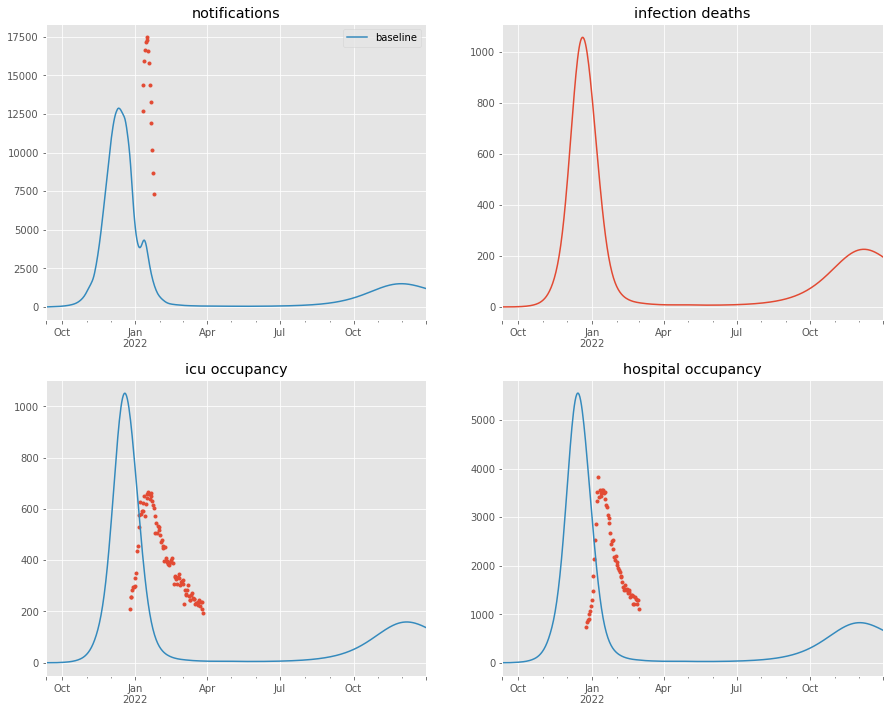

In [6]:
# Define what we want to plot
outputs_to_plot = ["notifications", "infection_deaths", "icu_occupancy", "hospital_occupancy"]
plot_end_time = ref_times_to_dti(COVID_BASE_DATETIME, [1000.])[0]

fig = pyplot.figure(figsize=(15, 12))
for i_out, output in enumerate(outputs_to_plot):
    axis = fig.add_subplot(2, 2, i_out + 1)
    
    # Plotting
    if output in ts_set_dates:
        ts_set_dates[output].plot(style='.', label="")
    baseline_df[output].plot(label="baseline")
#     for scenario in range(len(sc_models)):
#         scenario_dfs[scenario][outputs_to_plot[i_out]].plot(label=project.param_set.scenarios[scenario]["description"])

    # Display
    axis.set_title(output.replace("_", " "))
    if i_out == 0:
        axis.legend()
    axis.set_xlim(left=model_start_time)

In [ ]:
baseline_df[[f"prop_immune_{stratum}" for stratum in IMMUNITY_STRATA[::-1]]].plot.area(figsize=(10, 7))

<AxesSubplot:>